# Naive Bayes Classifier

In [1]:
import pandas as pd
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import utils

## Base Line

In [2]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train["result"])

# Prediciton
y_pred = gnb_model.predict(X_test)

# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.9910188314823757

The result seems to good to be true, especially for a naive bayes classifier...  
Maybe the model is overfitting the data. As we know there are only a few defective individuals (lass then 1%). So even if the model mis-classifies them, it won't affect the score all that much...

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


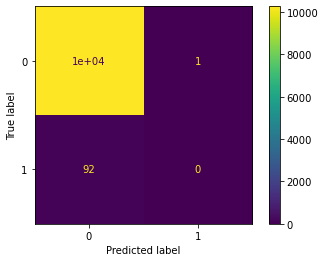

In [3]:
plot_confusion_matrix(gnb_model, X_test, y_test)
plt.show()

In the confusion matrix we can clearly see that valid individuals are properly classified whereas **all** the defective individuals are classified as valid individuals. The model is definitely overfitting the data due to the misrepresentation of defective individuals in the population.

## Balanced Classes

### Remove Individuals

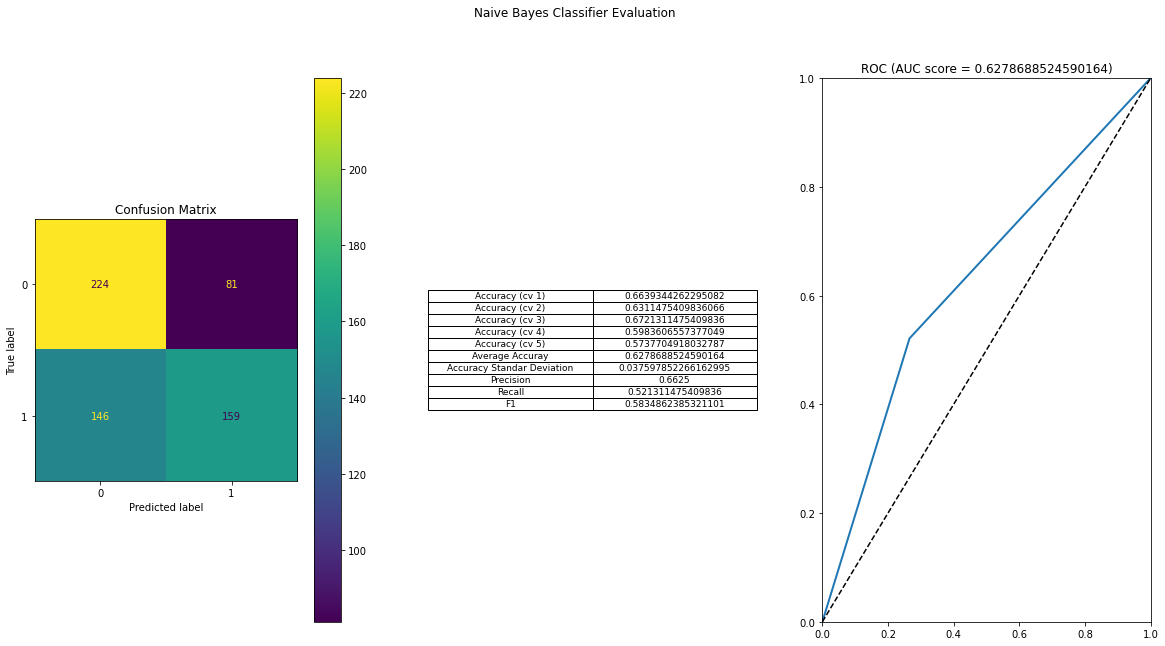

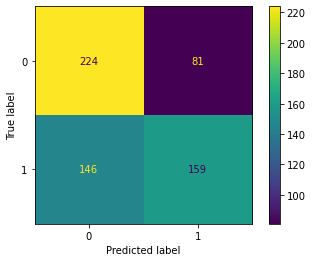

In [4]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = GaussianNB()

# Evaluation
utils.modelEvaluation(clf, train_input, train_output["result"], model_name="Naive Bayes Classifier")

With the classes (valid/defective) having equal proportion in the global population there is an improvement. The classifier is now able to classify some of the defective individuals as defective. On the other hand, there are now more missclassified valid individuals...

### Duplicating Individuals

In [ ]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output, modify=False)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train["result"])

# Prediction
y_pred = gnb_model.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.6077657604988794

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


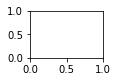

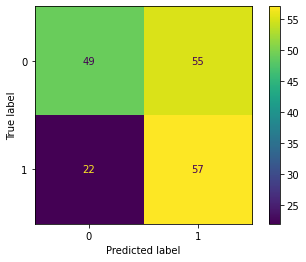

In [ ]:
utils.modelEvaluation(gnb_model, X_train, X_test, y_train, y_test, "Naive Bayes Classifier")